In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from rich import print
from scipy.optimize import curve_fit
from decimal import Decimal, ROUND_HALF_UP
from matplotlib.backends.backend_pdf import PdfPages
plt.rcParams['font.size'] = 21
plt.rcParams['lines.linewidth'] = 2
bins = [1, 2, 4, 5, 8, 10, 16, 22, 32]
while True:
    x = bins[-1]
    if x > 10**8:
        break
    bins.append(int(x * np.sqrt(2)))

bins1 = [1]
cnt = 0
while True:
    cnt += 1
    x = bins1[-1]
    if x > 10**8:
        break
    if cnt > 1000:
        break
    bins1.append(x*1.4)
bins1 = sorted(list(set(int(i) for i in bins1)))

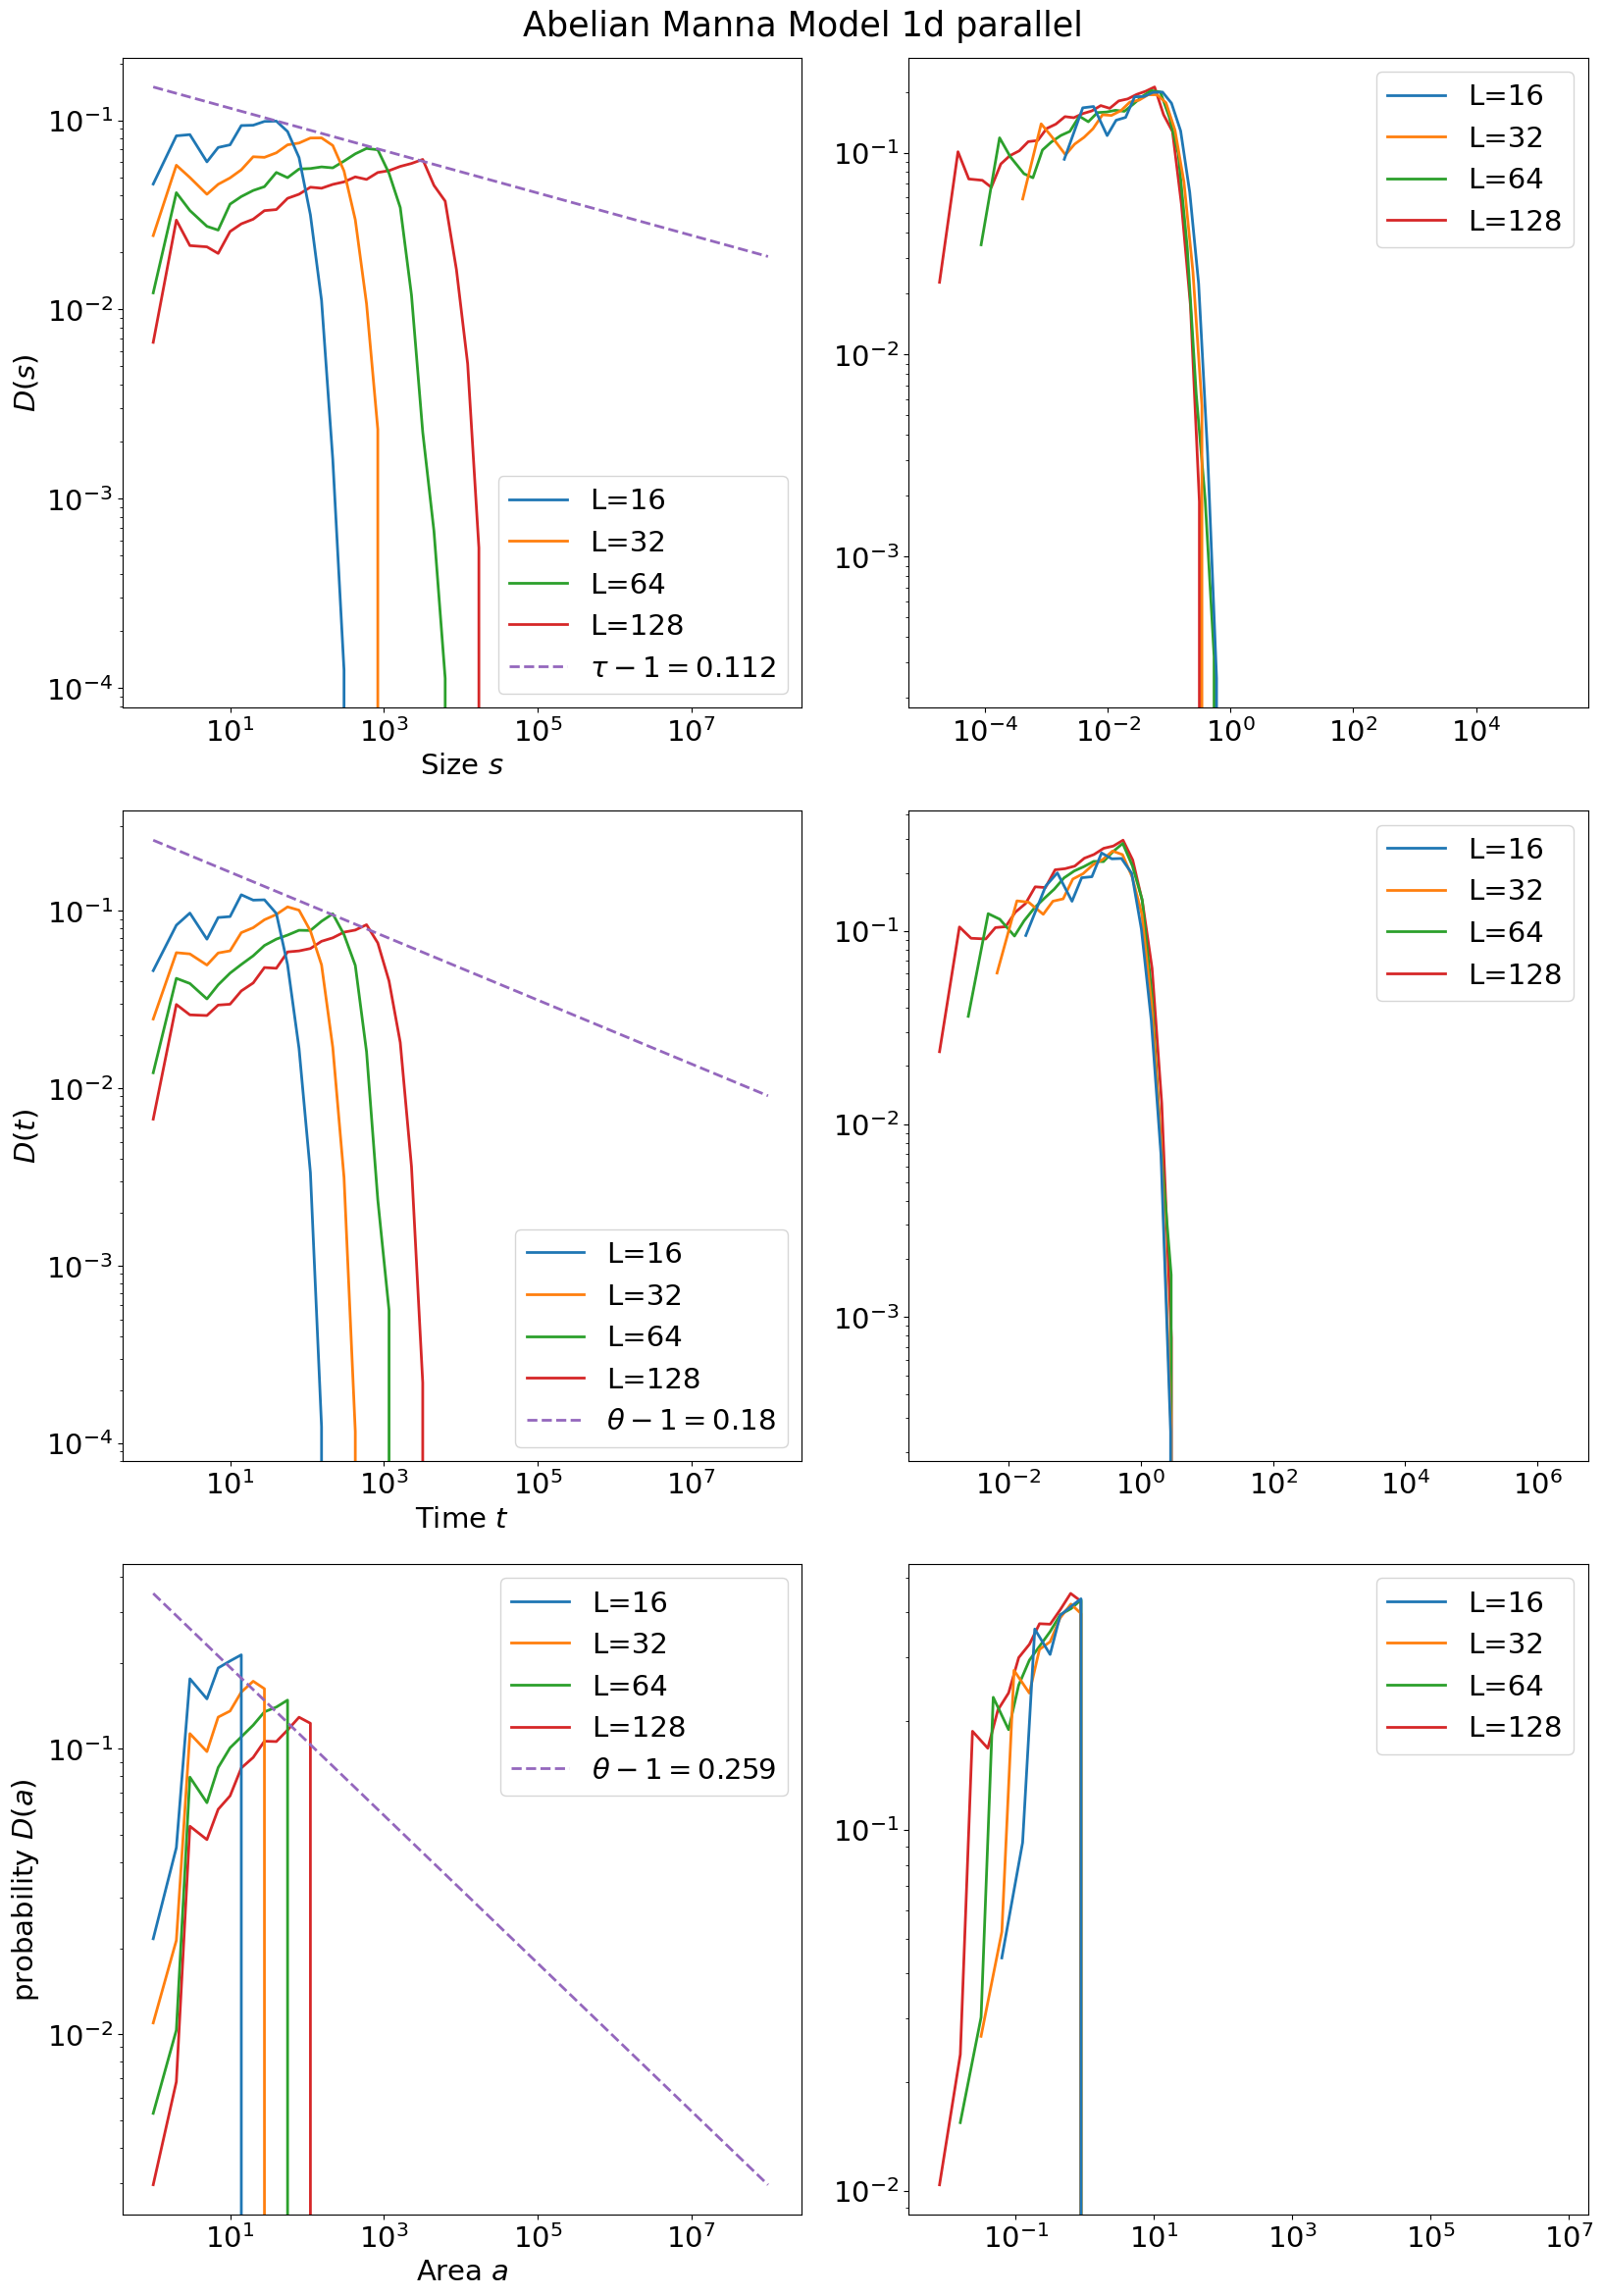

In [8]:
ratio = 8
fig, axs = plt.subplots(3, 2, figsize=(2.1*ratio,3*ratio))
plt.suptitle(f'Abelian Manna Model 1d parallel')
for y in range(3):
    for x in range(2):
        axs[y][x].set_xscale('log')
        axs[y][x].set_yscale('log')

axs[0][0].set_ylabel(r'$D(s)$')
axs[0][0].set_xlabel(r'Size $s$')

axs[1][0].set_ylabel(r'$D(t)$')
axs[1][0].set_xlabel(r'Time $t$')

axs[2][0].set_ylabel(r'probability $D(a)$')
axs[2][0].set_xlabel(r'Area $a$')

n = [4,5,6,7]
Ls = [2**i for i in n]
iteration = 10**4

for L in Ls:
    file_name = f'data/parallel/{L}_{iteration}.dat'
    df = pd.read_csv(file_name,header=0)
    df = df[df['size'] != 0]

    y,x = np.histogram(df['size'].values, bins=bins1)
    y = [i/np.sum(y) for i in y]
    y.append(0)

    s = [i/(L**2.253) for i in x]
    Ds = [i*(L**0.252336) for i in y]

    axs[0][0].plot(x,y,label=f"L={L}",zorder=-L)
    axs[0][1].plot(s,Ds,label=f"L={L}",zorder=-L)

    y,x = np.histogram(df['time'].values, bins=bins1)
    y = [i/np.sum(y) for i in y]
    y.append(0)

    s = [i/(L**1.445) for i in x]
    Ds = [i*(L**0.2601) for i in y]

    axs[1][0].plot(x,y,label=f"L={L}",zorder=-L)
    axs[1][1].plot(s,Ds,label=f"L={L}",zorder=-L)

    y,x = np.histogram(df['area'].values, bins=bins1)
    y = [i/np.sum(y) for i in y]
    y.append(0)

    s = [i/(L**0.998) for i in x]
    Ds = [i*(L**0.258482) for i in y]

    axs[2][0].plot(x,y,label=f"L={L}",zorder=-L)
    axs[2][1].plot(s,Ds,label=f"L={L}",zorder=-L)

th_x = np.arange(start=1,stop=10**8,step=10**2)
axs[0][0].plot(th_x, th_x**(-0.112)*0.15, '--',label=r'$\tau-1=0.112$')
axs[1][0].plot(th_x, th_x**(-0.18)*0.25, '--',label=r'$\theta-1=0.18$')
axs[2][0].plot(th_x, th_x**(-0.259)*0.35, '--',label=r'$\theta-1=0.259$')
for y in range(3):
    for x in range(2):
        axs[y][x].legend()

plt.tight_layout()
pp = PdfPages('Abelian Manna Model 1d parallel.pdf')
pp.savefig(transparent=True,bbox_inches='tight', pad_inches=0.1,dpi=600)
pp.close()

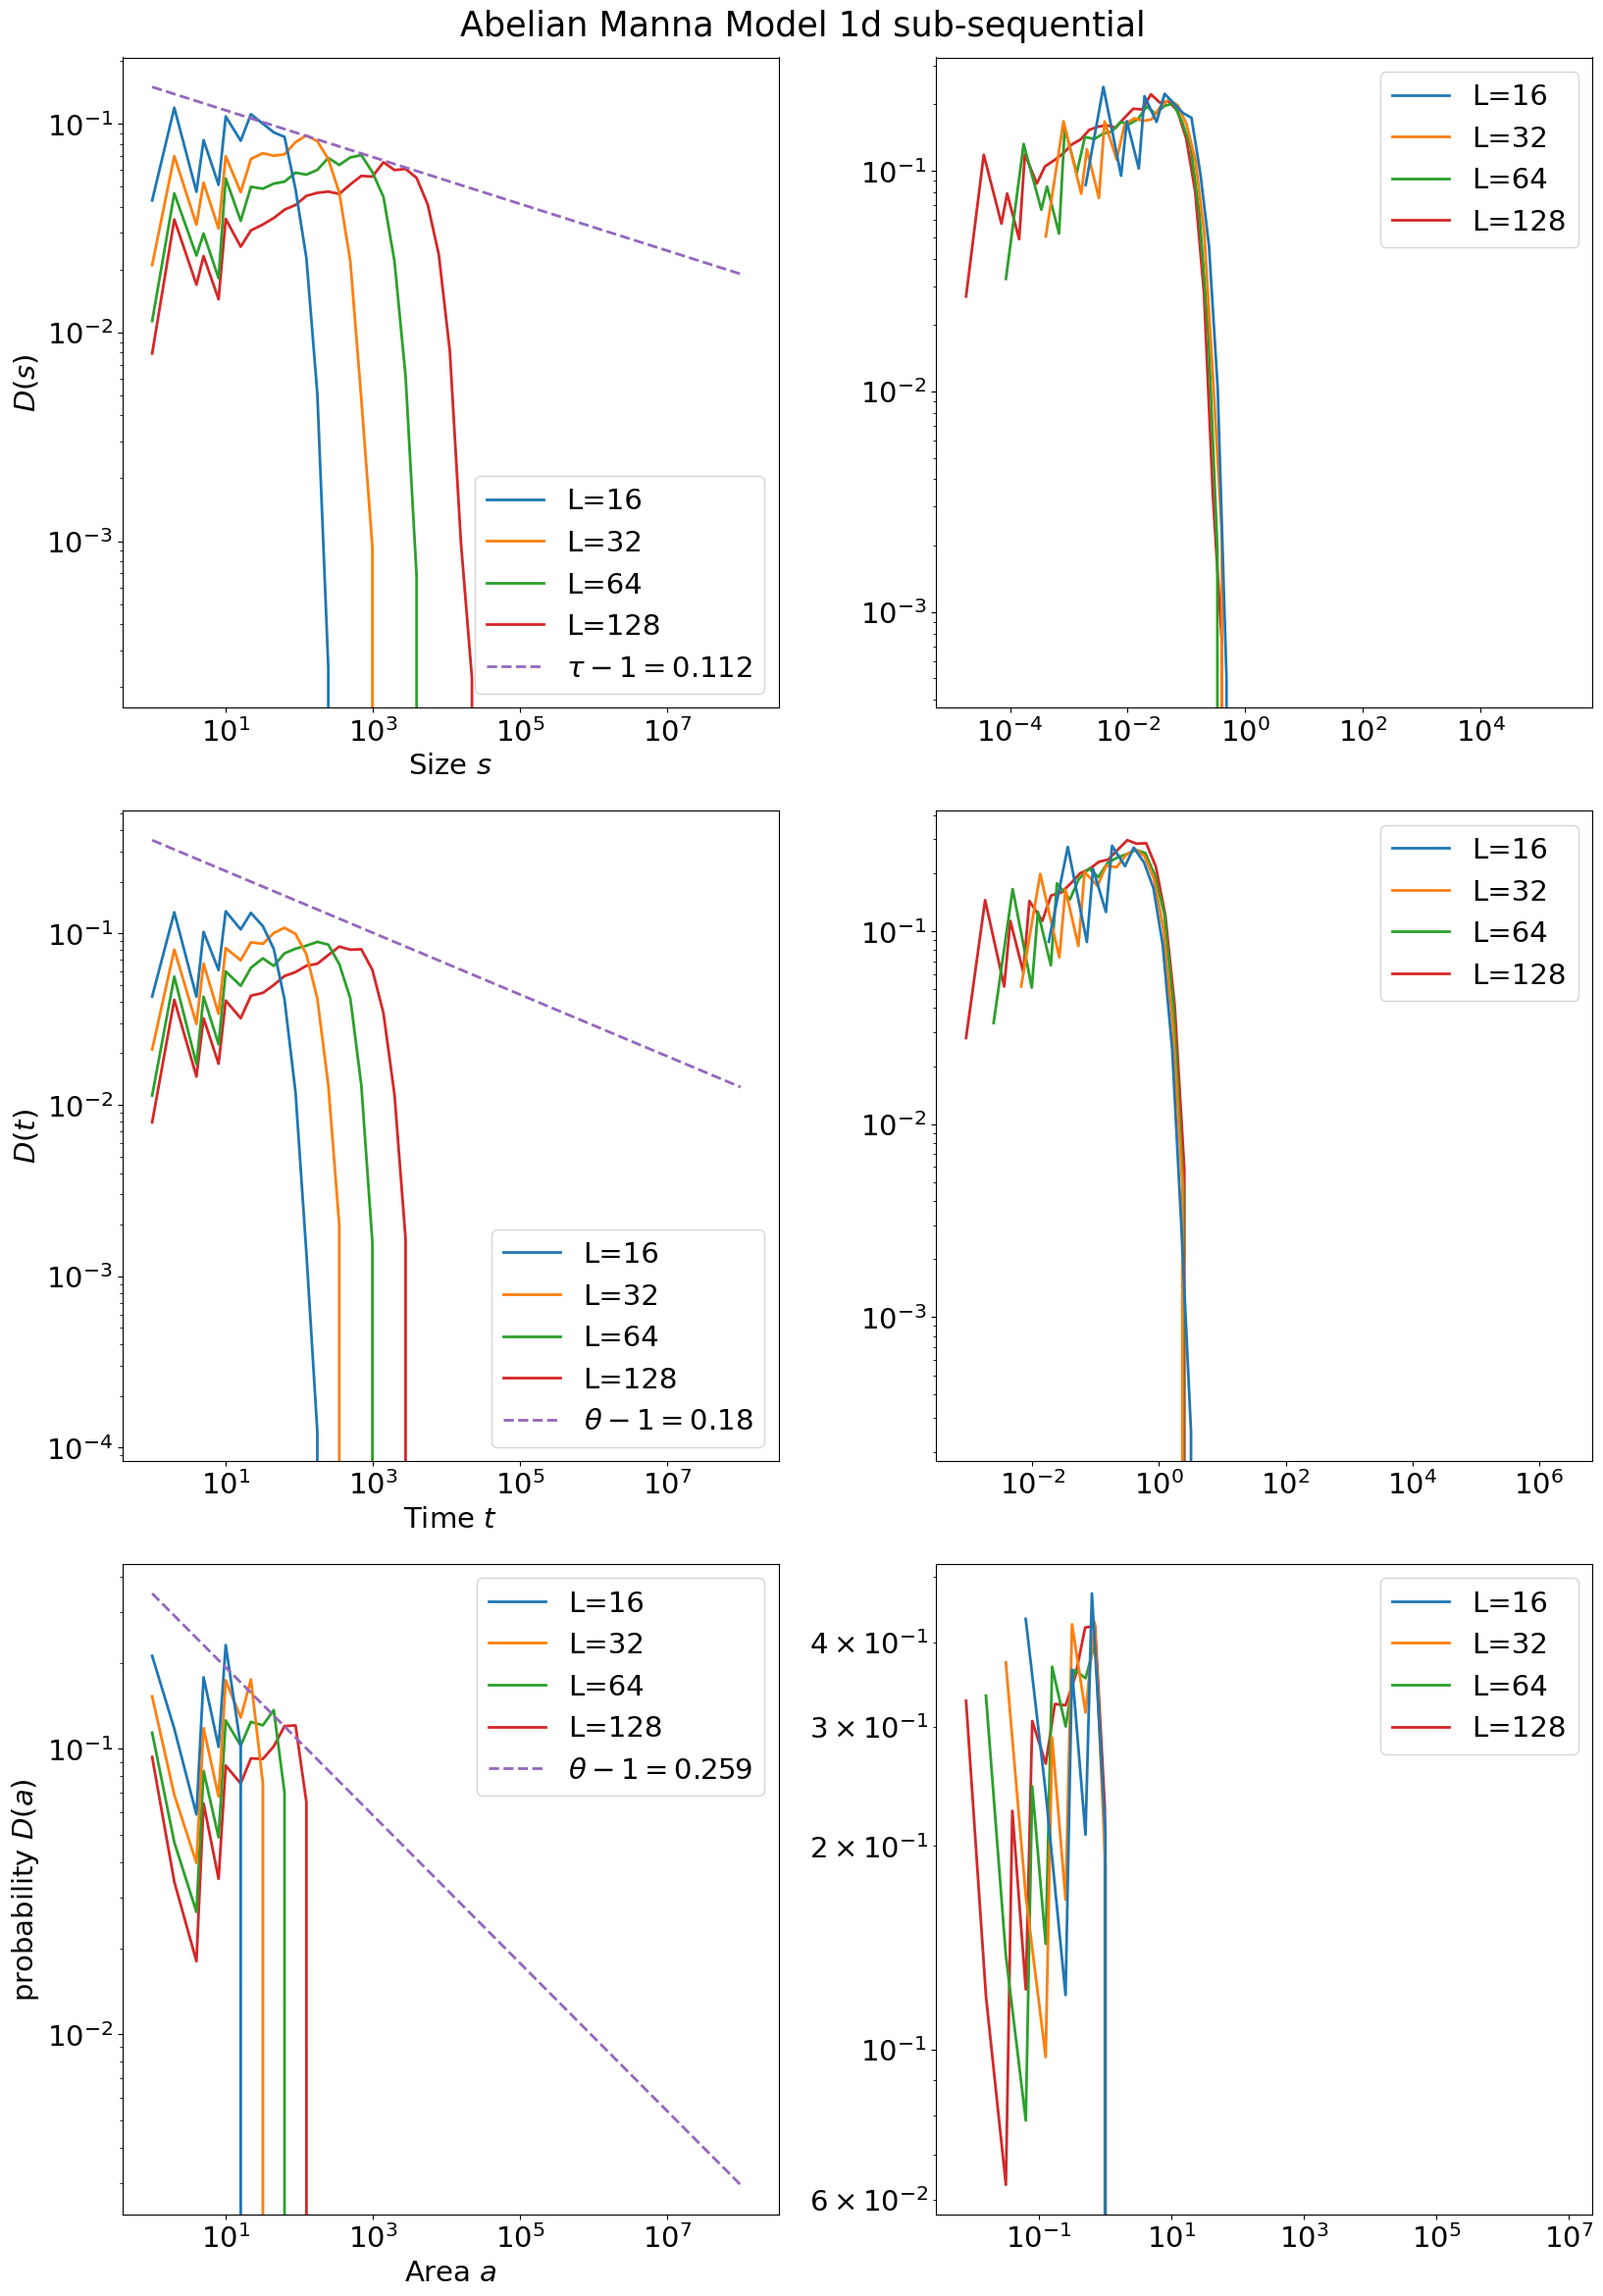

In [7]:
ratio = 8
fig, axs = plt.subplots(3, 2, figsize=(2.1*ratio,3*ratio))
plt.suptitle(f'Abelian Manna Model 1d sub-sequential')
for y in range(3):
    for x in range(2):
        axs[y][x].set_xscale('log')
        axs[y][x].set_yscale('log')

axs[0][0].set_ylabel(r'$D(s)$')
axs[0][0].set_xlabel(r'Size $s$')

axs[1][0].set_ylabel(r'$D(t)$')
axs[1][0].set_xlabel(r'Time $t$')

axs[2][0].set_ylabel(r'probability $D(a)$')
axs[2][0].set_xlabel(r'Area $a$')

n = [4,5,6,7]
Ls = [2**i for i in n]
iteration = 10**4

for L in Ls:
    file_name = f'data/seq/{L}_{iteration}.dat'
    df = pd.read_csv(file_name,header=0)

    y,x = np.histogram(df['size'].values, bins=bins)
    y = [i/np.sum(y) for i in y]
    y.append(0)

    s = [i/(L**2.253) for i in x]
    Ds = [i*(L**0.252336) for i in y]

    axs[0][0].plot(x,y,label=f"L={L}",zorder=-L)
    axs[0][1].plot(s,Ds,label=f"L={L}",zorder=-L)

    y,x = np.histogram(df['time'].values, bins=bins)
    y = [i/np.sum(y) for i in y]
    y.append(0)

    s = [i/(L**1.445) for i in x]
    Ds = [i*(L**0.2601) for i in y]

    axs[1][0].plot(x,y,label=f"L={L}",zorder=-L)
    axs[1][1].plot(s,Ds,label=f"L={L}",zorder=-L)

    y,x = np.histogram(df['area'].values, bins=bins)
    y = [i/np.sum(y) for i in y]
    y.append(0)

    s = [i/(L**0.998) for i in x]
    Ds = [i*(L**0.258482) for i in y]

    axs[2][0].plot(x,y,label=f"L={L}",zorder=-L)
    axs[2][1].plot(s,Ds,label=f"L={L}",zorder=-L)

th_x = np.arange(start=1,stop=10**8,step=10**2)
axs[0][0].plot(th_x, th_x**(-0.112)*0.15, '--',label=r'$\tau-1=0.112$')
axs[1][0].plot(th_x, th_x**(-0.18)*0.35, '--',label=r'$\theta-1=0.18$')
axs[2][0].plot(th_x, th_x**(-0.259)*0.35, '--',label=r'$\theta-1=0.259$')
for y in range(3):
    for x in range(2):
        axs[y][x].legend()

plt.tight_layout()
pp = PdfPages('Abelian Manna Model 1d sub-sequential.pdf')
pp.savefig(transparent=True,bbox_inches='tight', pad_inches=0.1,dpi=600)
pp.close()